# LSTM with autoencoder outliner detection

https://github.com/BLarzalere/LSTM-Autoencoder-for-Anomaly-Detection/blob/master/Sensor%20Anomaly%20Detection.ipynb

https://github.com/curiousily/Deep-Learning-For-Hackers/blob/master/14.time-series-anomaly-detection.ipynb

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [9]:
!gdown --id 10vdMg_RazoIatwrT7azKFX4P02OebU76 --output spx.csv

Downloading...
From: https://drive.google.com/uc?id=10vdMg_RazoIatwrT7azKFX4P02OebU76
To: /content/spx.csv
100% 152k/152k [00:00<00:00, 4.80MB/s]


In [10]:
df = pd.read_csv('spx.csv', parse_dates=['date'], index_col='date')

In [11]:
df.head()

,close
date,
1986-01-02,209.59
1986-01-03,210.88
1986-01-06,210.65
1986-01-07,213.80
1986-01-08,207.97


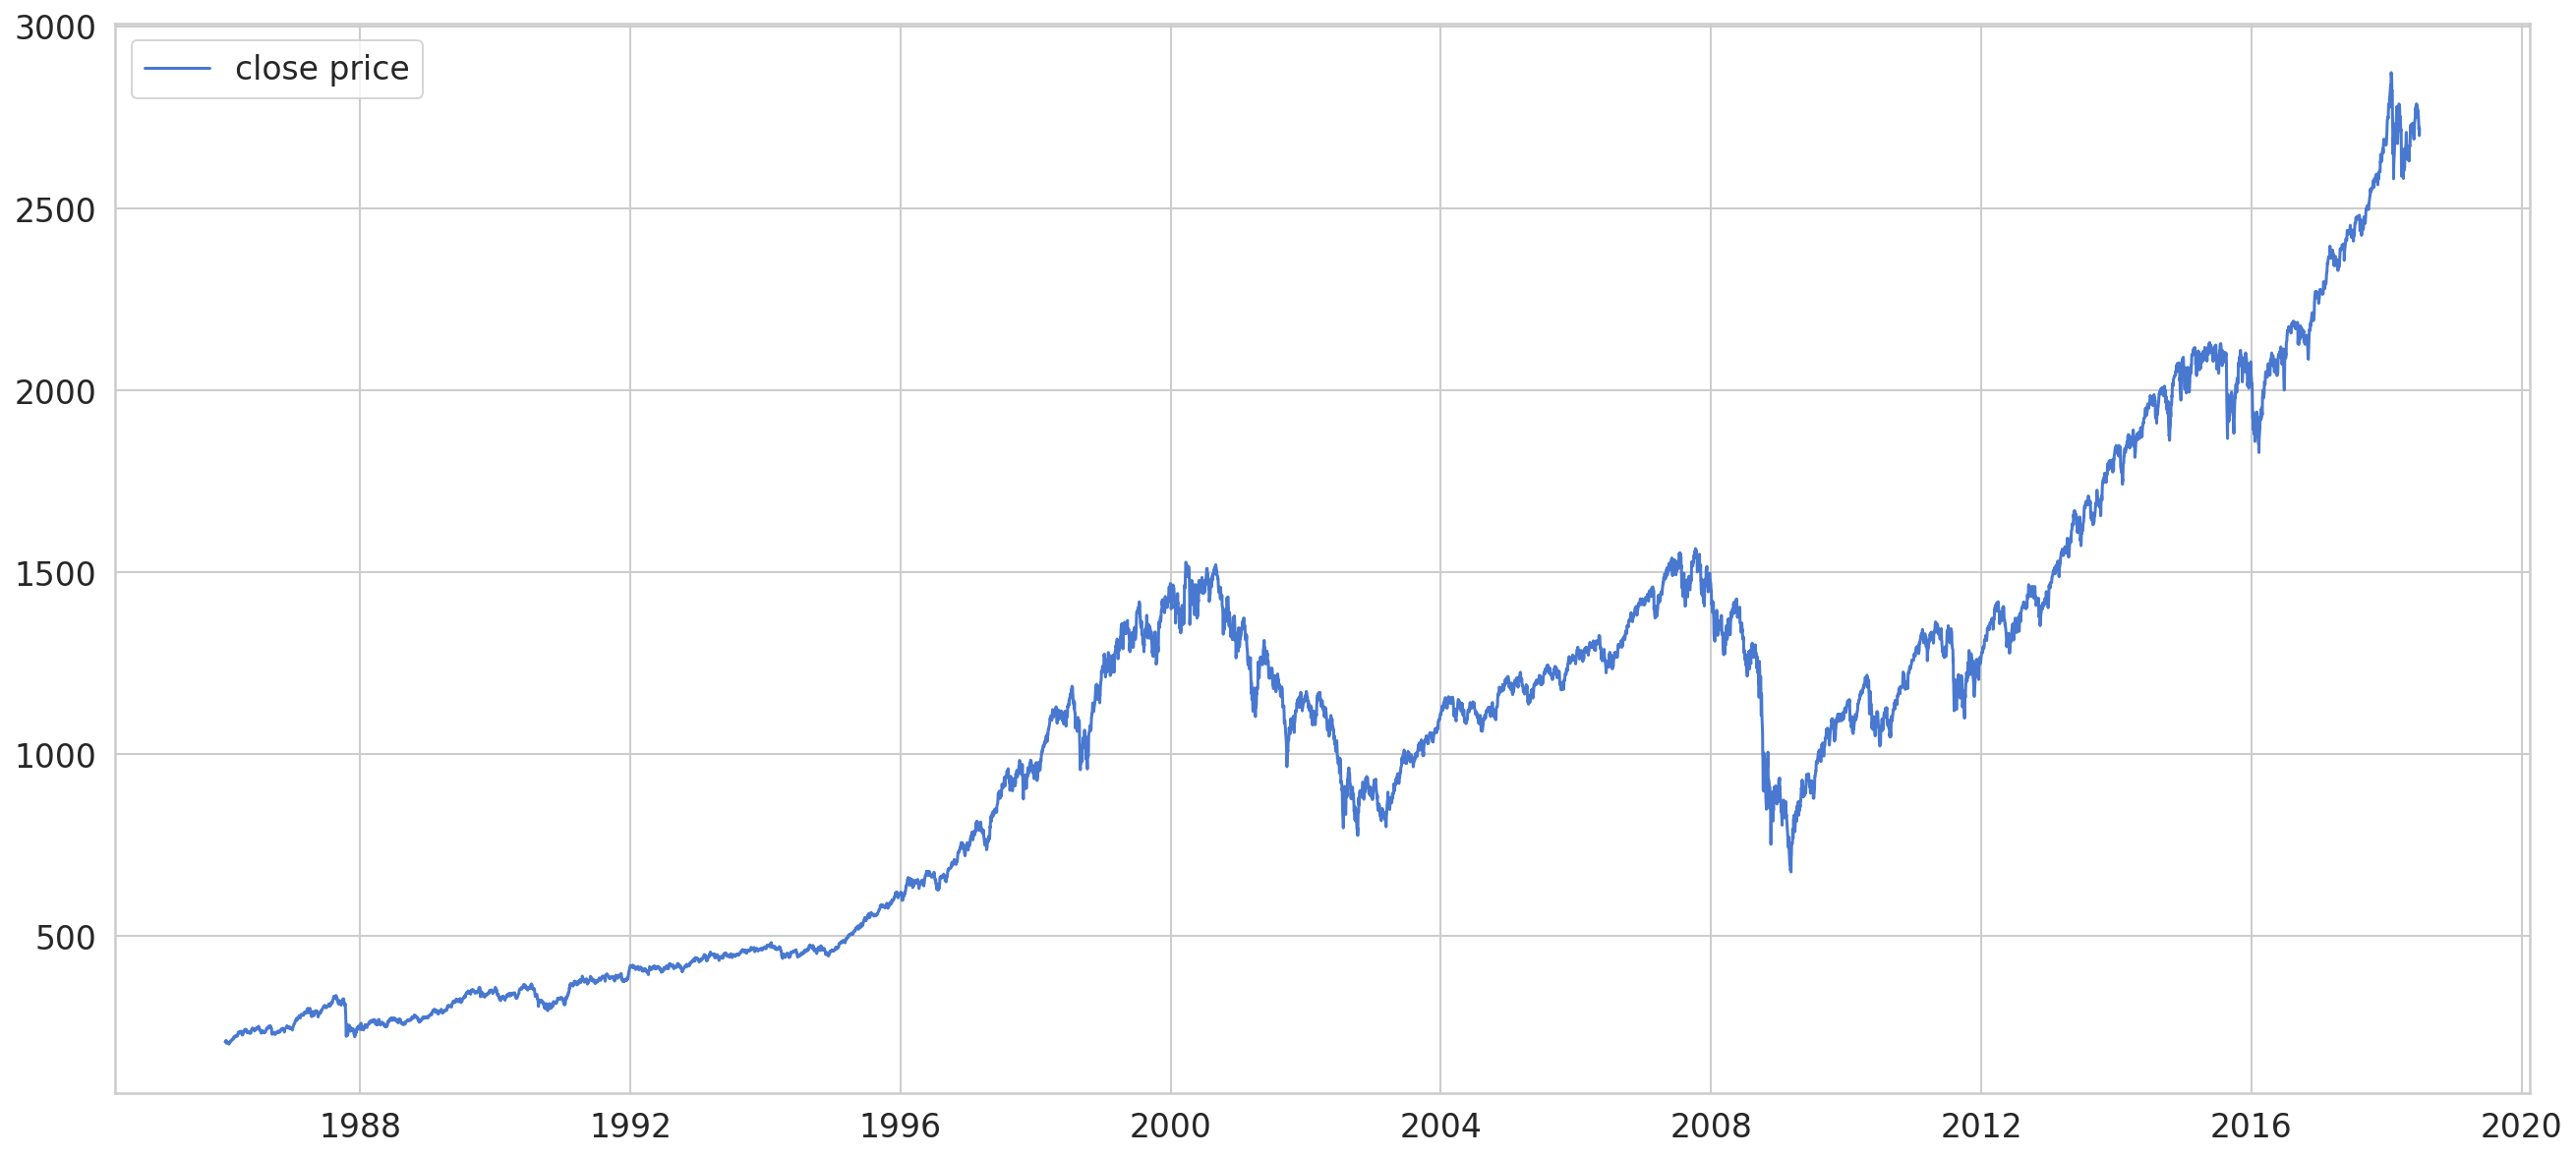

In [12]:
plt.plot(df, label='close price')
plt.legend();

In [16]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(6553, 1) (1639, 1)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['close']])

train['close'] = scaler.transform(train[['close']])
test['close'] = scaler.transform(test[['close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [19]:
TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[['close']], train.close, TIME_STEPS)
X_test, y_test = create_dataset(test[['close']], test.close, TIME_STEPS)

print(X_train.shape)

(6523, 30, 1)


In [ ]:
  ''' inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)

    '''

" inputs = Input(shape=(X.shape[1], X.shape[2]))\n  L1 = LSTM(16, activation='relu', return_sequences=True, \n            kernel_regularizer=regularizers.l2(0.00))(inputs)\n  L2 = LSTM(4, activation='relu', return_sequences=False)(L1)\n  L3 = RepeatVector(X.shape[1])(L2)\n  L4 = LSTM(4, activation='relu', return_sequences=True)(L3)\n  L5 = LSTM(16, activation='relu', return_sequences=True)(L4)\n  output = TimeDistributed(Dense(X.shape[2]))(L5)    \n  model = Model(inputs=inputs, outputs=output)\n\n  "

## create the model

### option 1:

In [7]:
'''
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu'
))
model.add(keras.layers.Dropout(rate=0.2))

#model.add(keras.layers.LSTM(units=16, activation='relu'))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))

#model.add(keras.layers.LSTM(units=16, return_sequences=True,activation='relu'))
model.add(keras.layers.LSTM(units=64, return_sequences=True,activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))

model.compile(loss='mae', optimizer='adam', metrics="accuracy")

'''

'\nmodel = keras.Sequential()\nmodel.add(keras.layers.LSTM(\n    units=64, \n    input_shape=(X_train.shape[1], X_train.shape[2]),activation=\'relu\'\n))\nmodel.add(keras.layers.Dropout(rate=0.2))\n\n#model.add(keras.layers.LSTM(units=16, activation=\'relu\'))\nmodel.add(keras.layers.RepeatVector(n=X_train.shape[1]))\n\n#model.add(keras.layers.LSTM(units=16, return_sequences=True,activation=\'relu\'))\nmodel.add(keras.layers.LSTM(units=64, return_sequences=True,activation=\'relu\'))\nmodel.add(keras.layers.Dropout(rate=0.2))\nmodel.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))\n\nmodel.compile(loss=\'mae\', optimizer=\'adam\', metrics="accuracy")\n\n'

### option2:

In [20]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=256, 
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))

model.add(keras.layers.LSTM(units=256, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [21]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/10
184/184 [==============================] - 36s 12ms/step - loss: 0.2017 - val_loss: 0.1833
Epoch 2/10
184/184 [==============================] - 2s 8ms/step - loss: 0.1605 - val_loss: 0.1120
Epoch 3/10
184/184 [==============================] - 2s 8ms/step - loss: 0.1225 - val_loss: 0.0658
Epoch 4/10
184/184 [==============================] - 2s 8ms/step - loss: 0.0949 - val_loss: 0.0481
Epoch 5/10
184/184 [==============================] - 2s 8ms/step - loss: 0.0854 - val_loss: 0.0628
Epoch 6/10
184/184 [==============================] - 2s 8ms/step - loss: 0.0878 - val_loss: 0.0518
Epoch 7/10
184/184 [==============================] - 2s 8ms/step - loss: 0.0993 - val_loss: 0.0827
Epoch 8/10
184/184 [==============================] - 2s 8ms/step - loss: 0.0969 - val_loss: 0.0459
Epoch 9/10
184/184 [==============================] - 2s 8ms/step - loss: 0.0961 - val_loss: 0.0463
Epoch 10/10
184/184 [==============================] - 2s 8ms/step - loss: 0.0940 - val_loss: 0.03

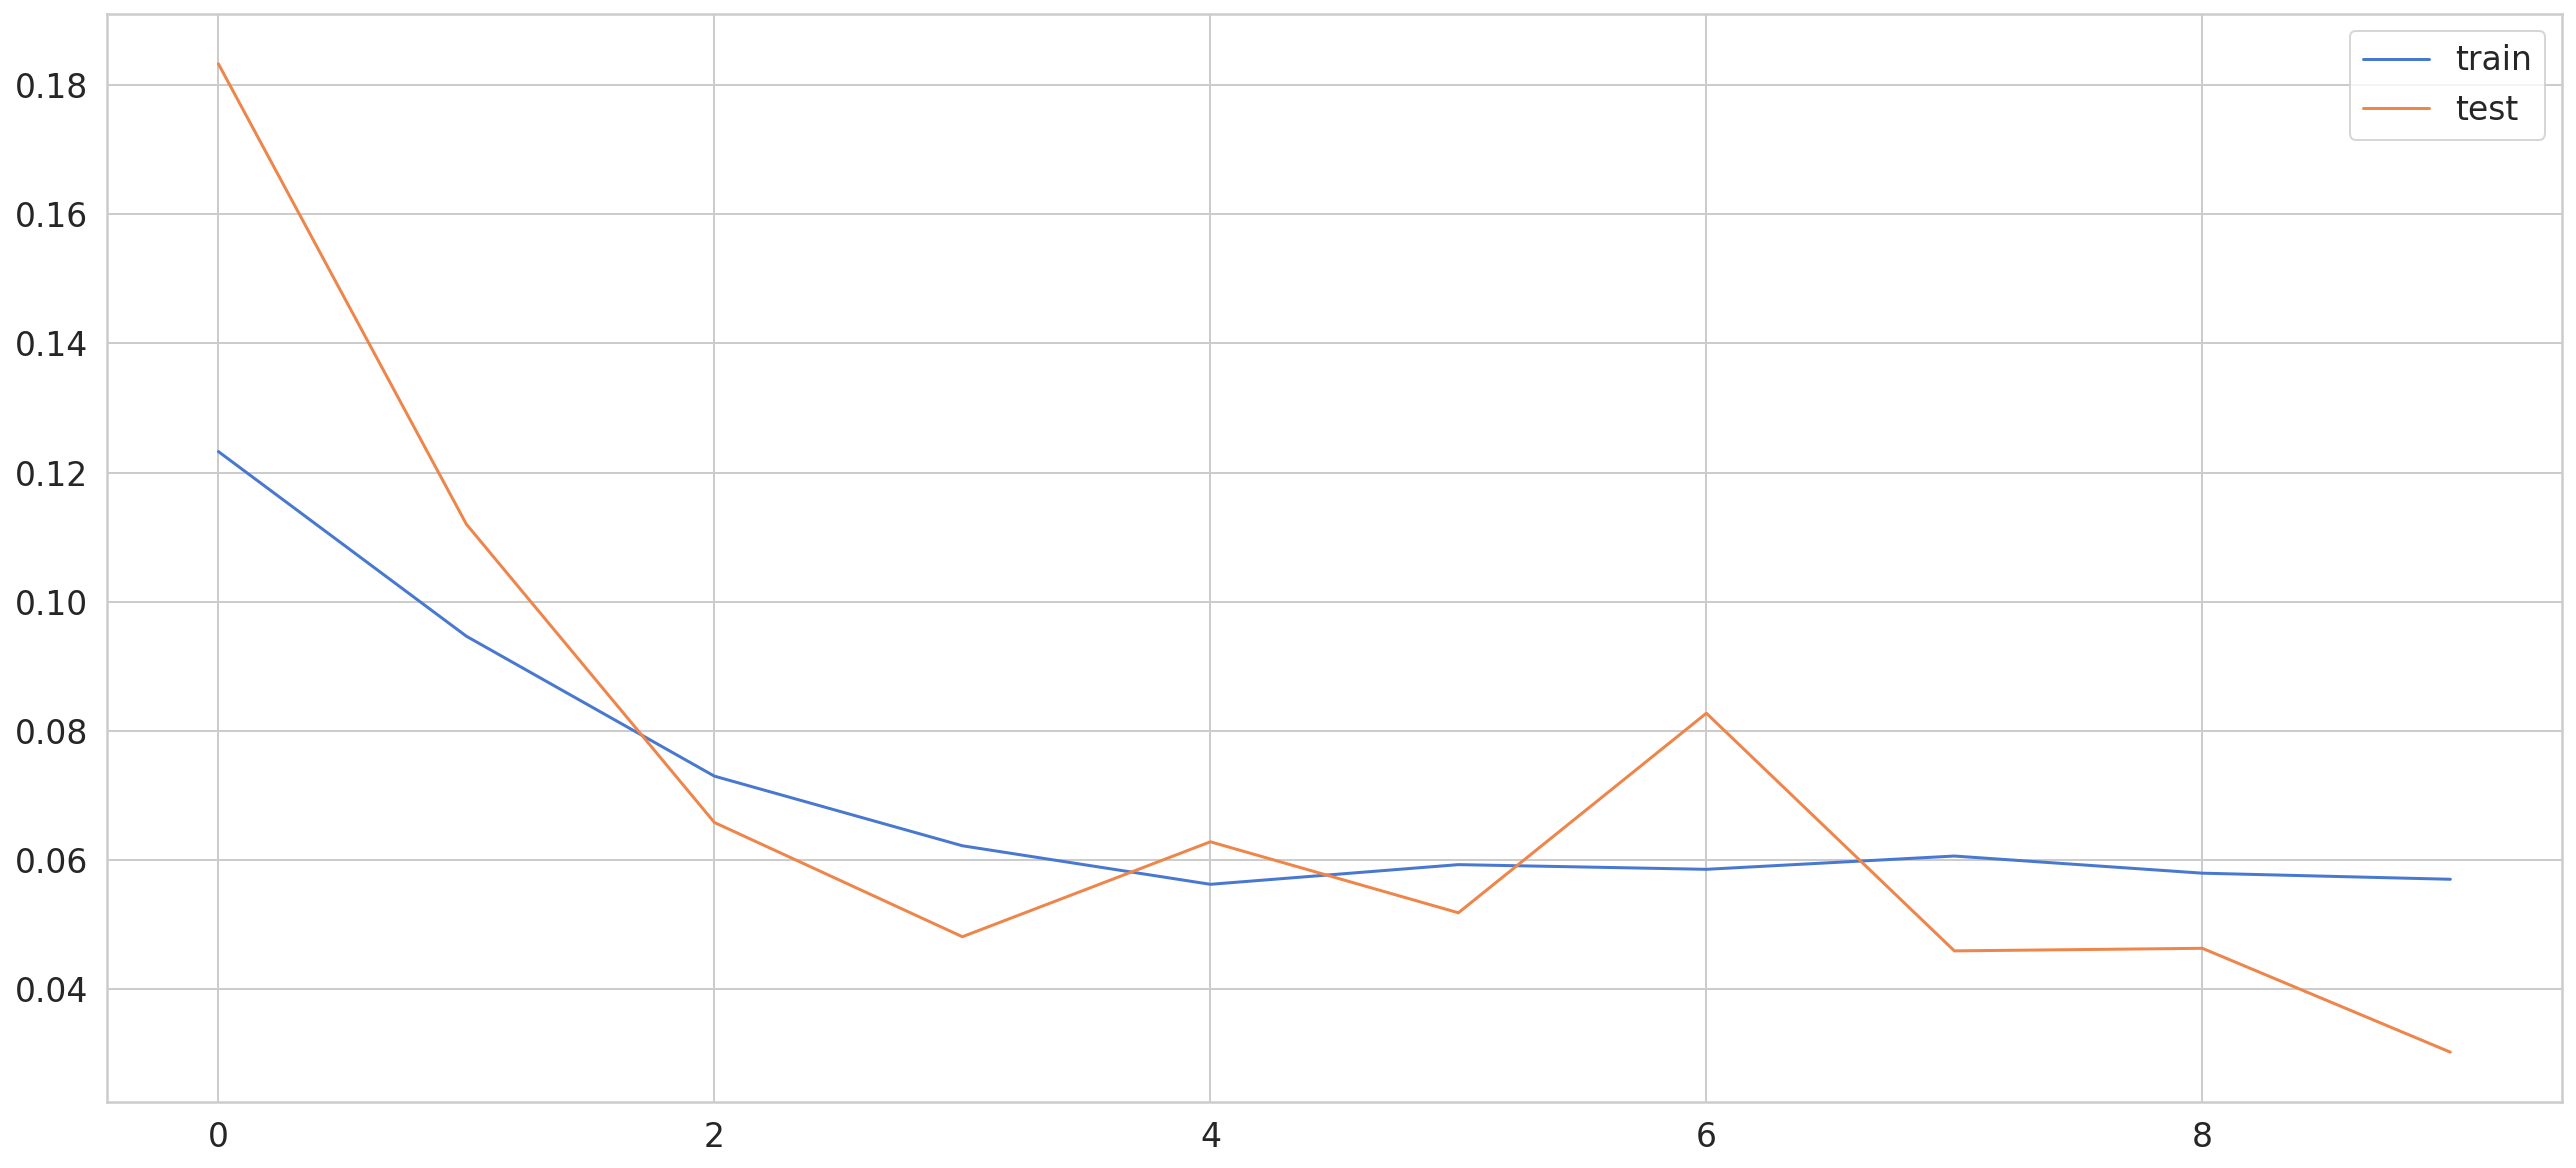

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

## calc the loss between ypred - ytest

In [24]:
X_train_pred = model.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


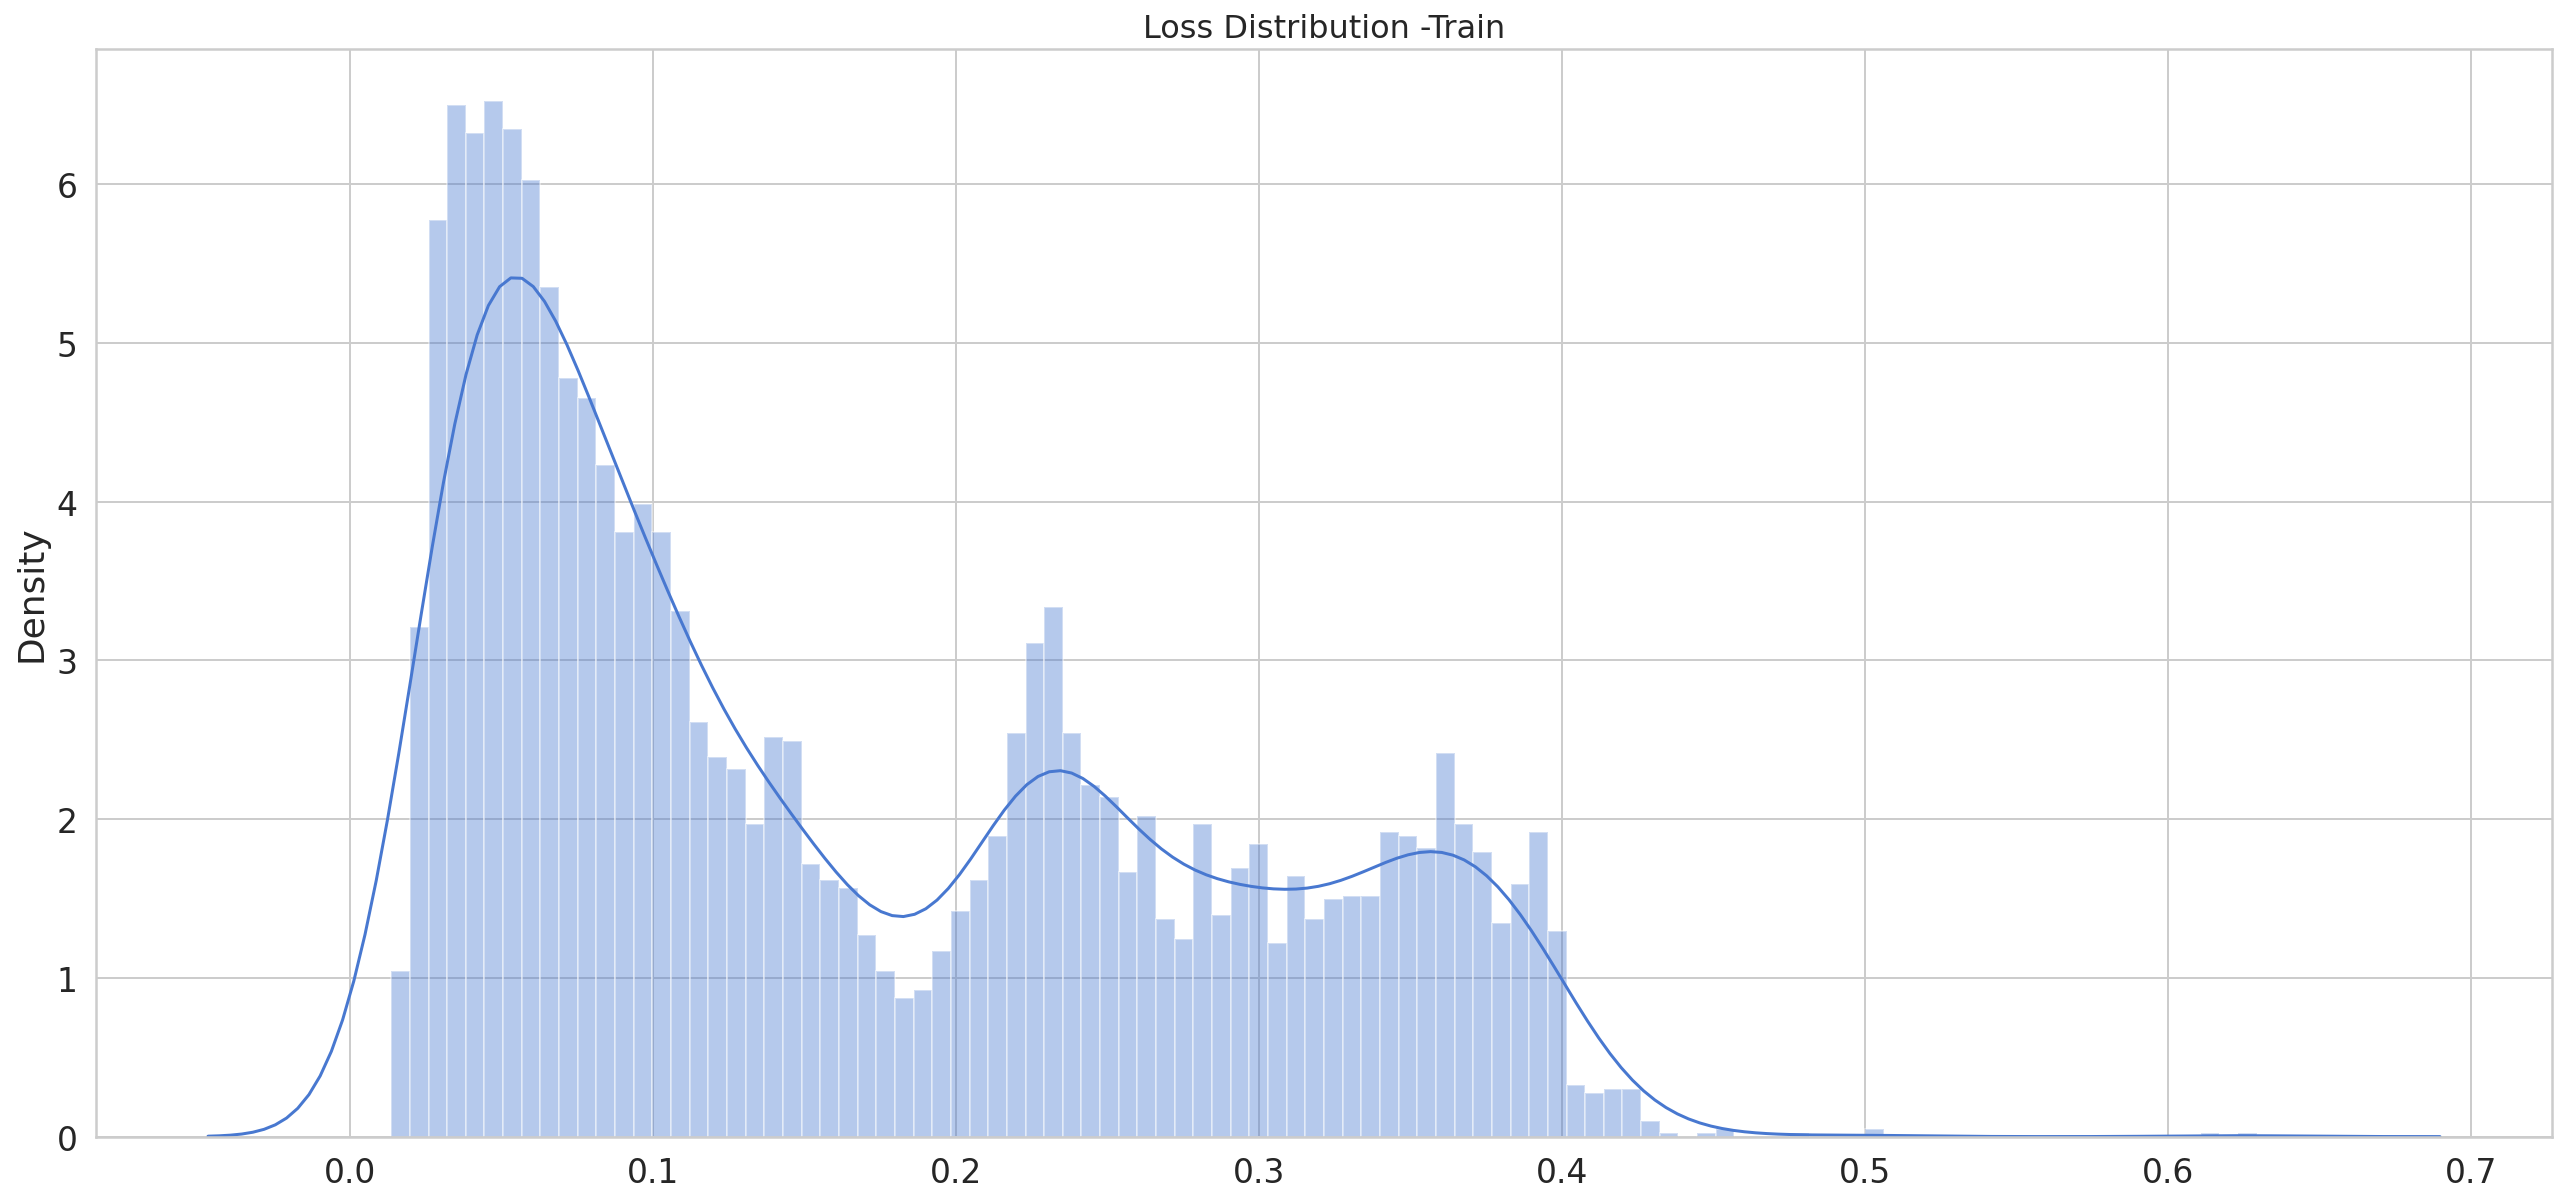

In [40]:
plt.title('Loss Distribution -Train', fontsize=16)
sns.distplot(train_mae_loss, bins=100, kde=True);

In [27]:
X_test_pred = model.predict(X_test)


test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


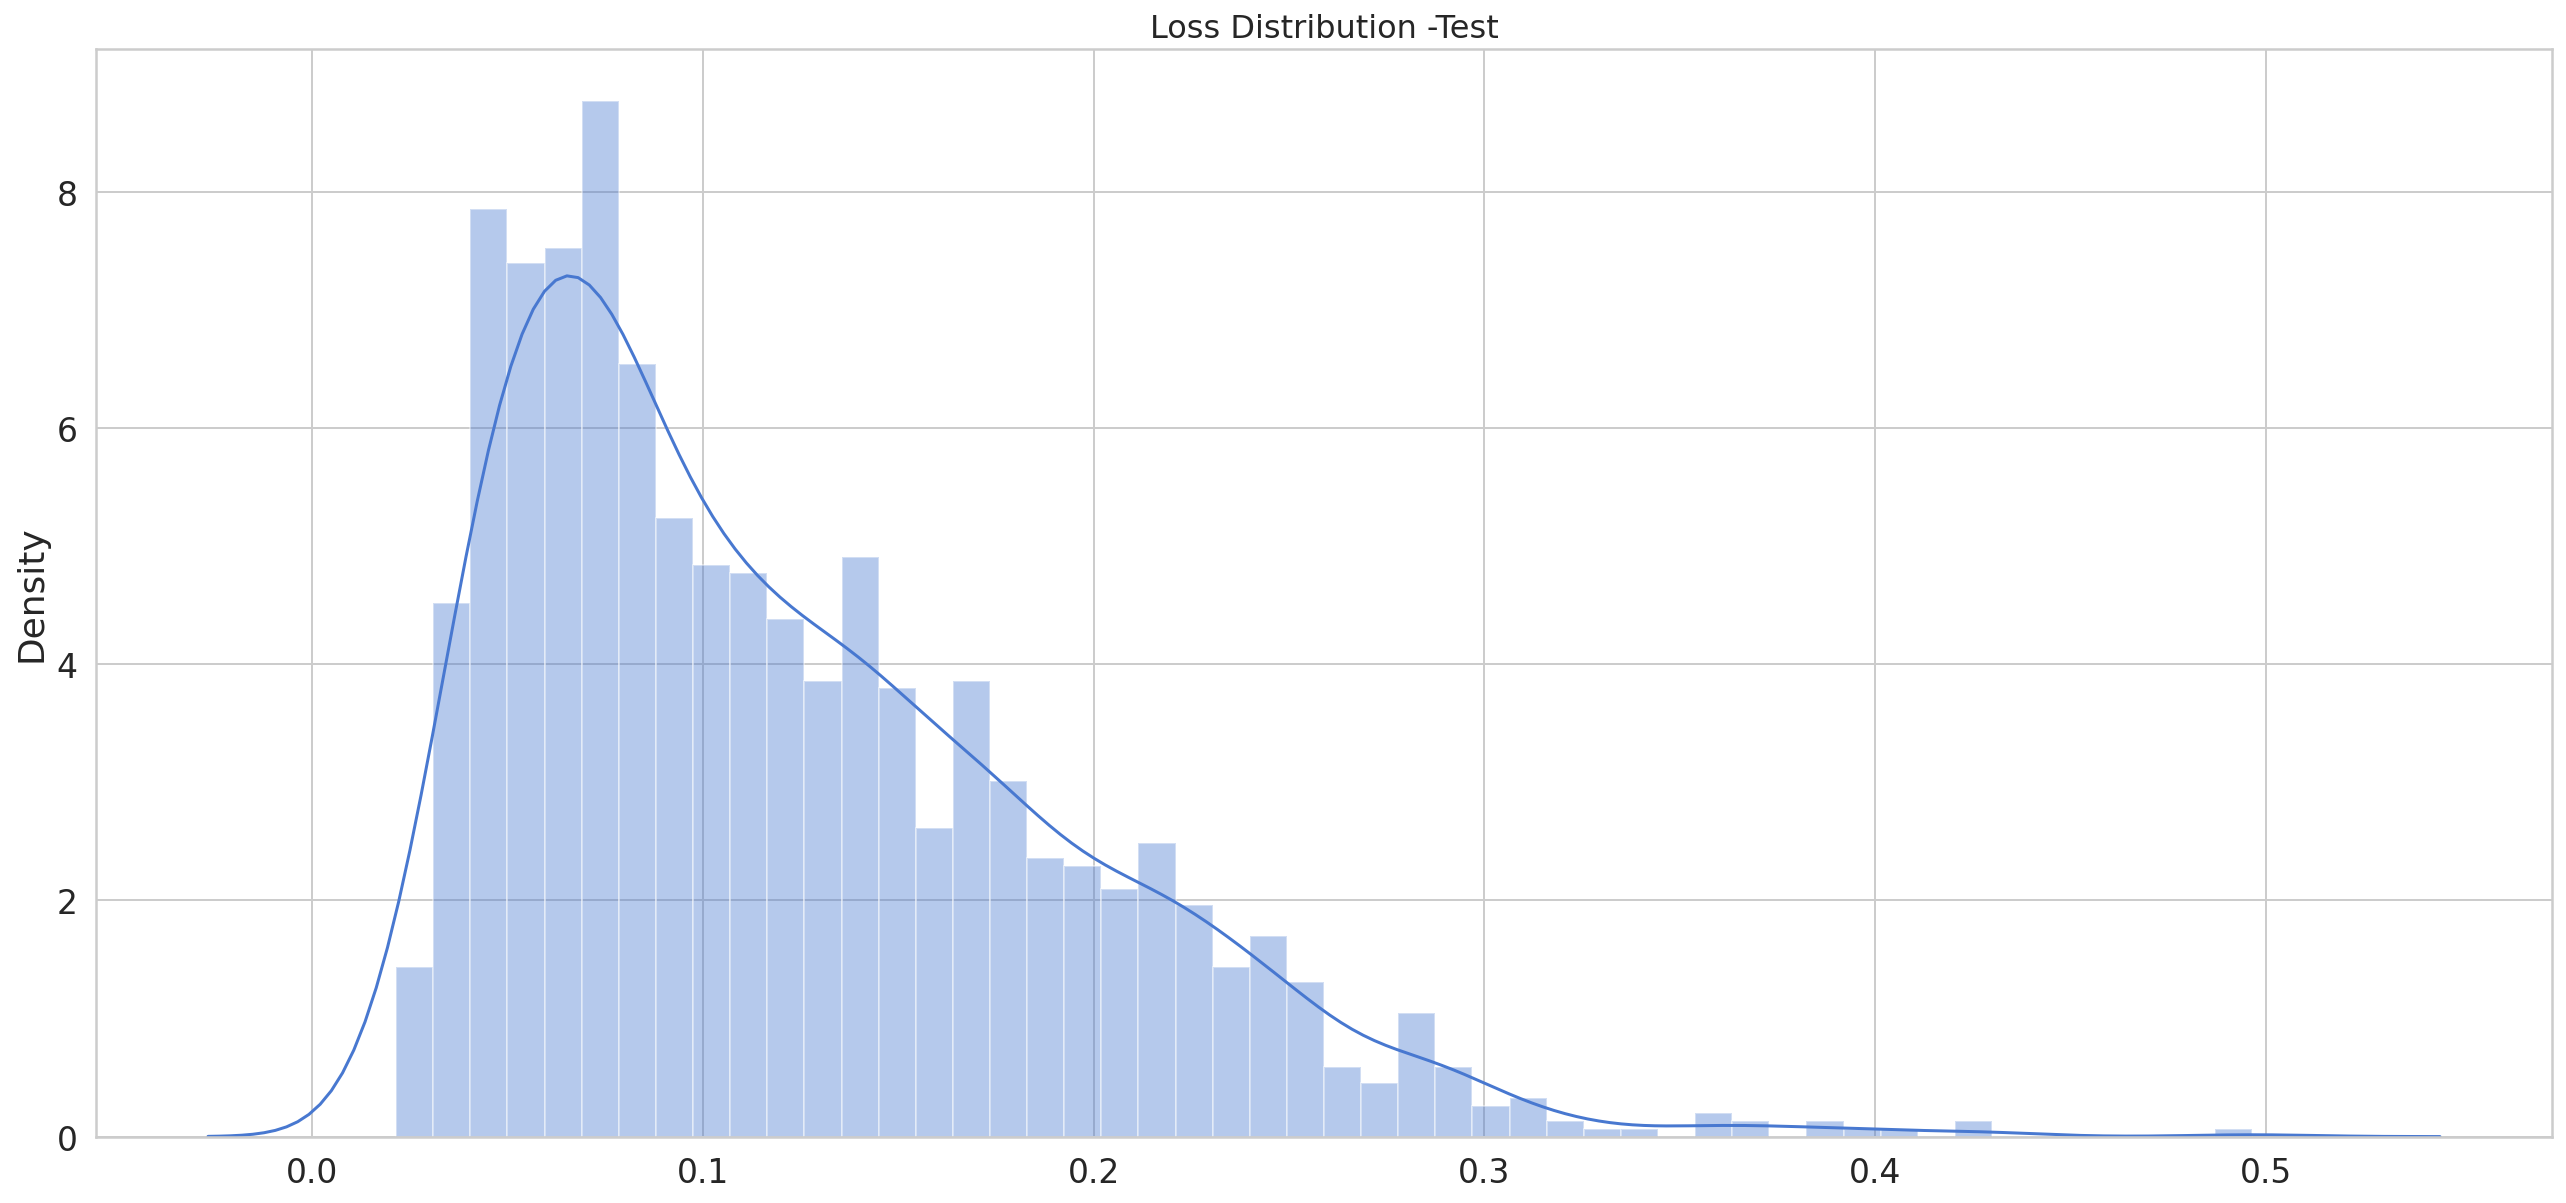

In [41]:
plt.title('Loss Distribution -Test', fontsize=16)
sns.distplot(test_mae_loss, bins=50, kde=True);

## calc threshold with std. deviation

In [33]:




test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss

#calculate threshold by std deviation *3

std_x_train=np.std(test_score_df.loss)*3
mean_x_train=np.mean(test_score_df.loss)

THRESHOLD = std_x_train

test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['close'] = test[TIME_STEPS:].close

THRESHOLD

0.21074901520070888

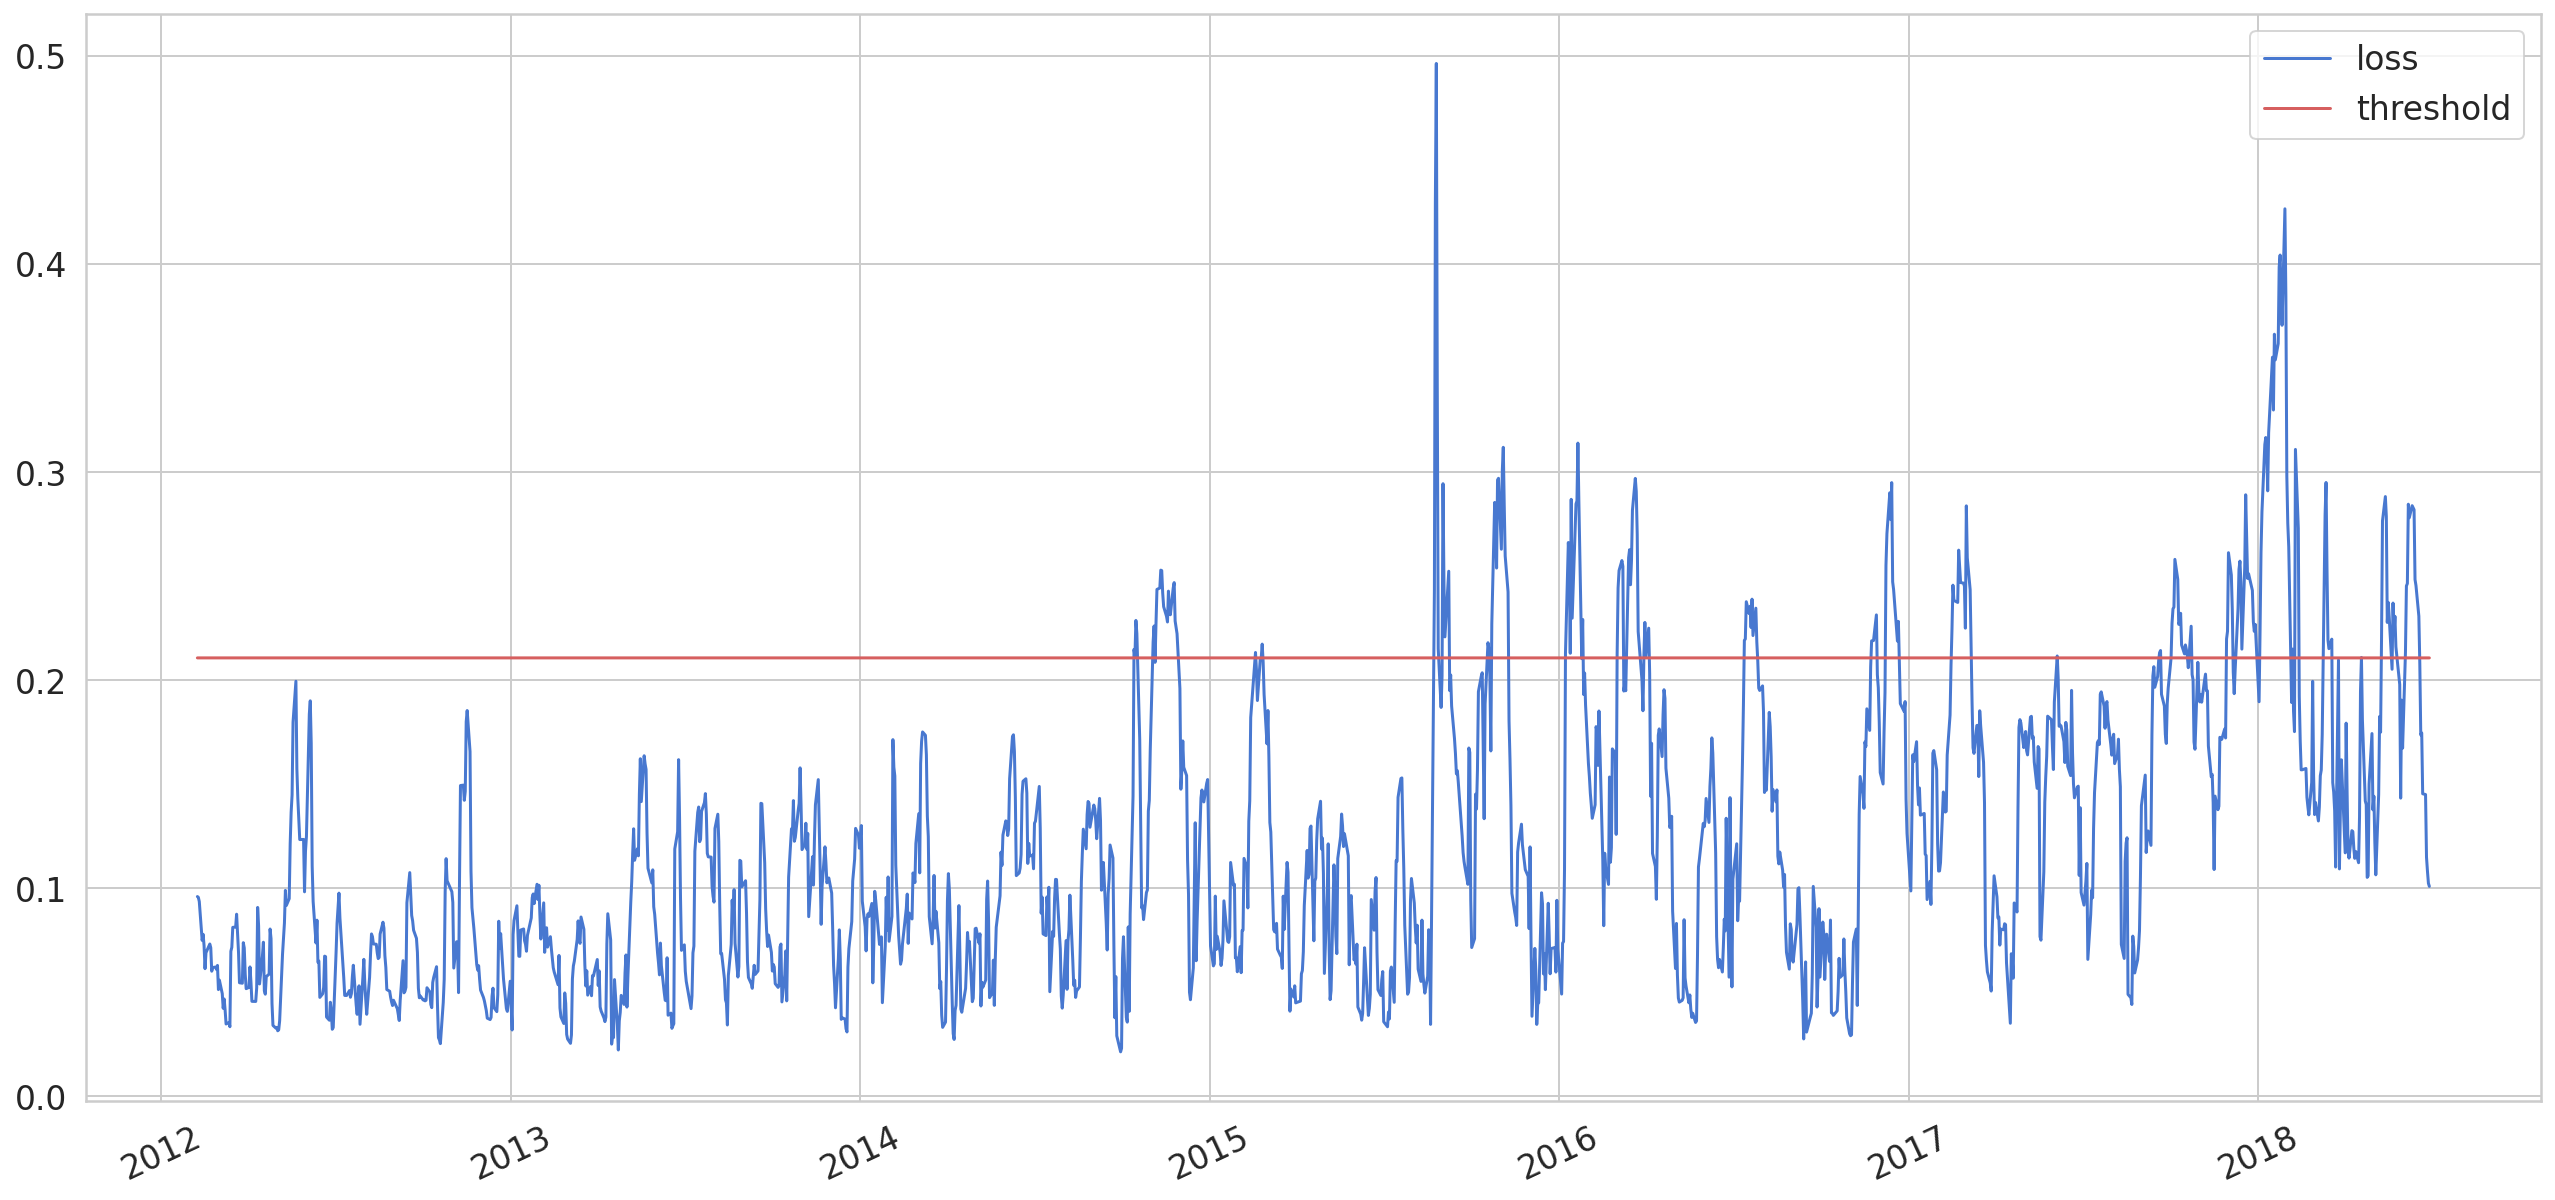

In [47]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold', color="r")
plt.xticks(rotation=25)
plt.legend();

## print and plot the anomalies

In [37]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head(30)

,loss,threshold,anomaly,close
date,,,,
2014-10-14,0.214825,0.210749,True,2.481620
2014-10-15,0.211727,0.210749,True,2.445169
2014-10-16,0.228759,0.210749,True,2.445816
2014-10-17,0.222435,0.210749,True,2.503333
2014-11-03,0.218474,0.210749,True,2.817404
2014-11-04,0.226073,0.210749,True,2.803719
2014-11-06,0.227245,0.210749,True,2.849518
2014-11-07,0.243647,0.210749,True,2.851219
2014-11-10,0.244336,0.210749,True,2.866413


In [36]:
anomalies.count()

loss         204
threshold    204
anomaly      204
close        204
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


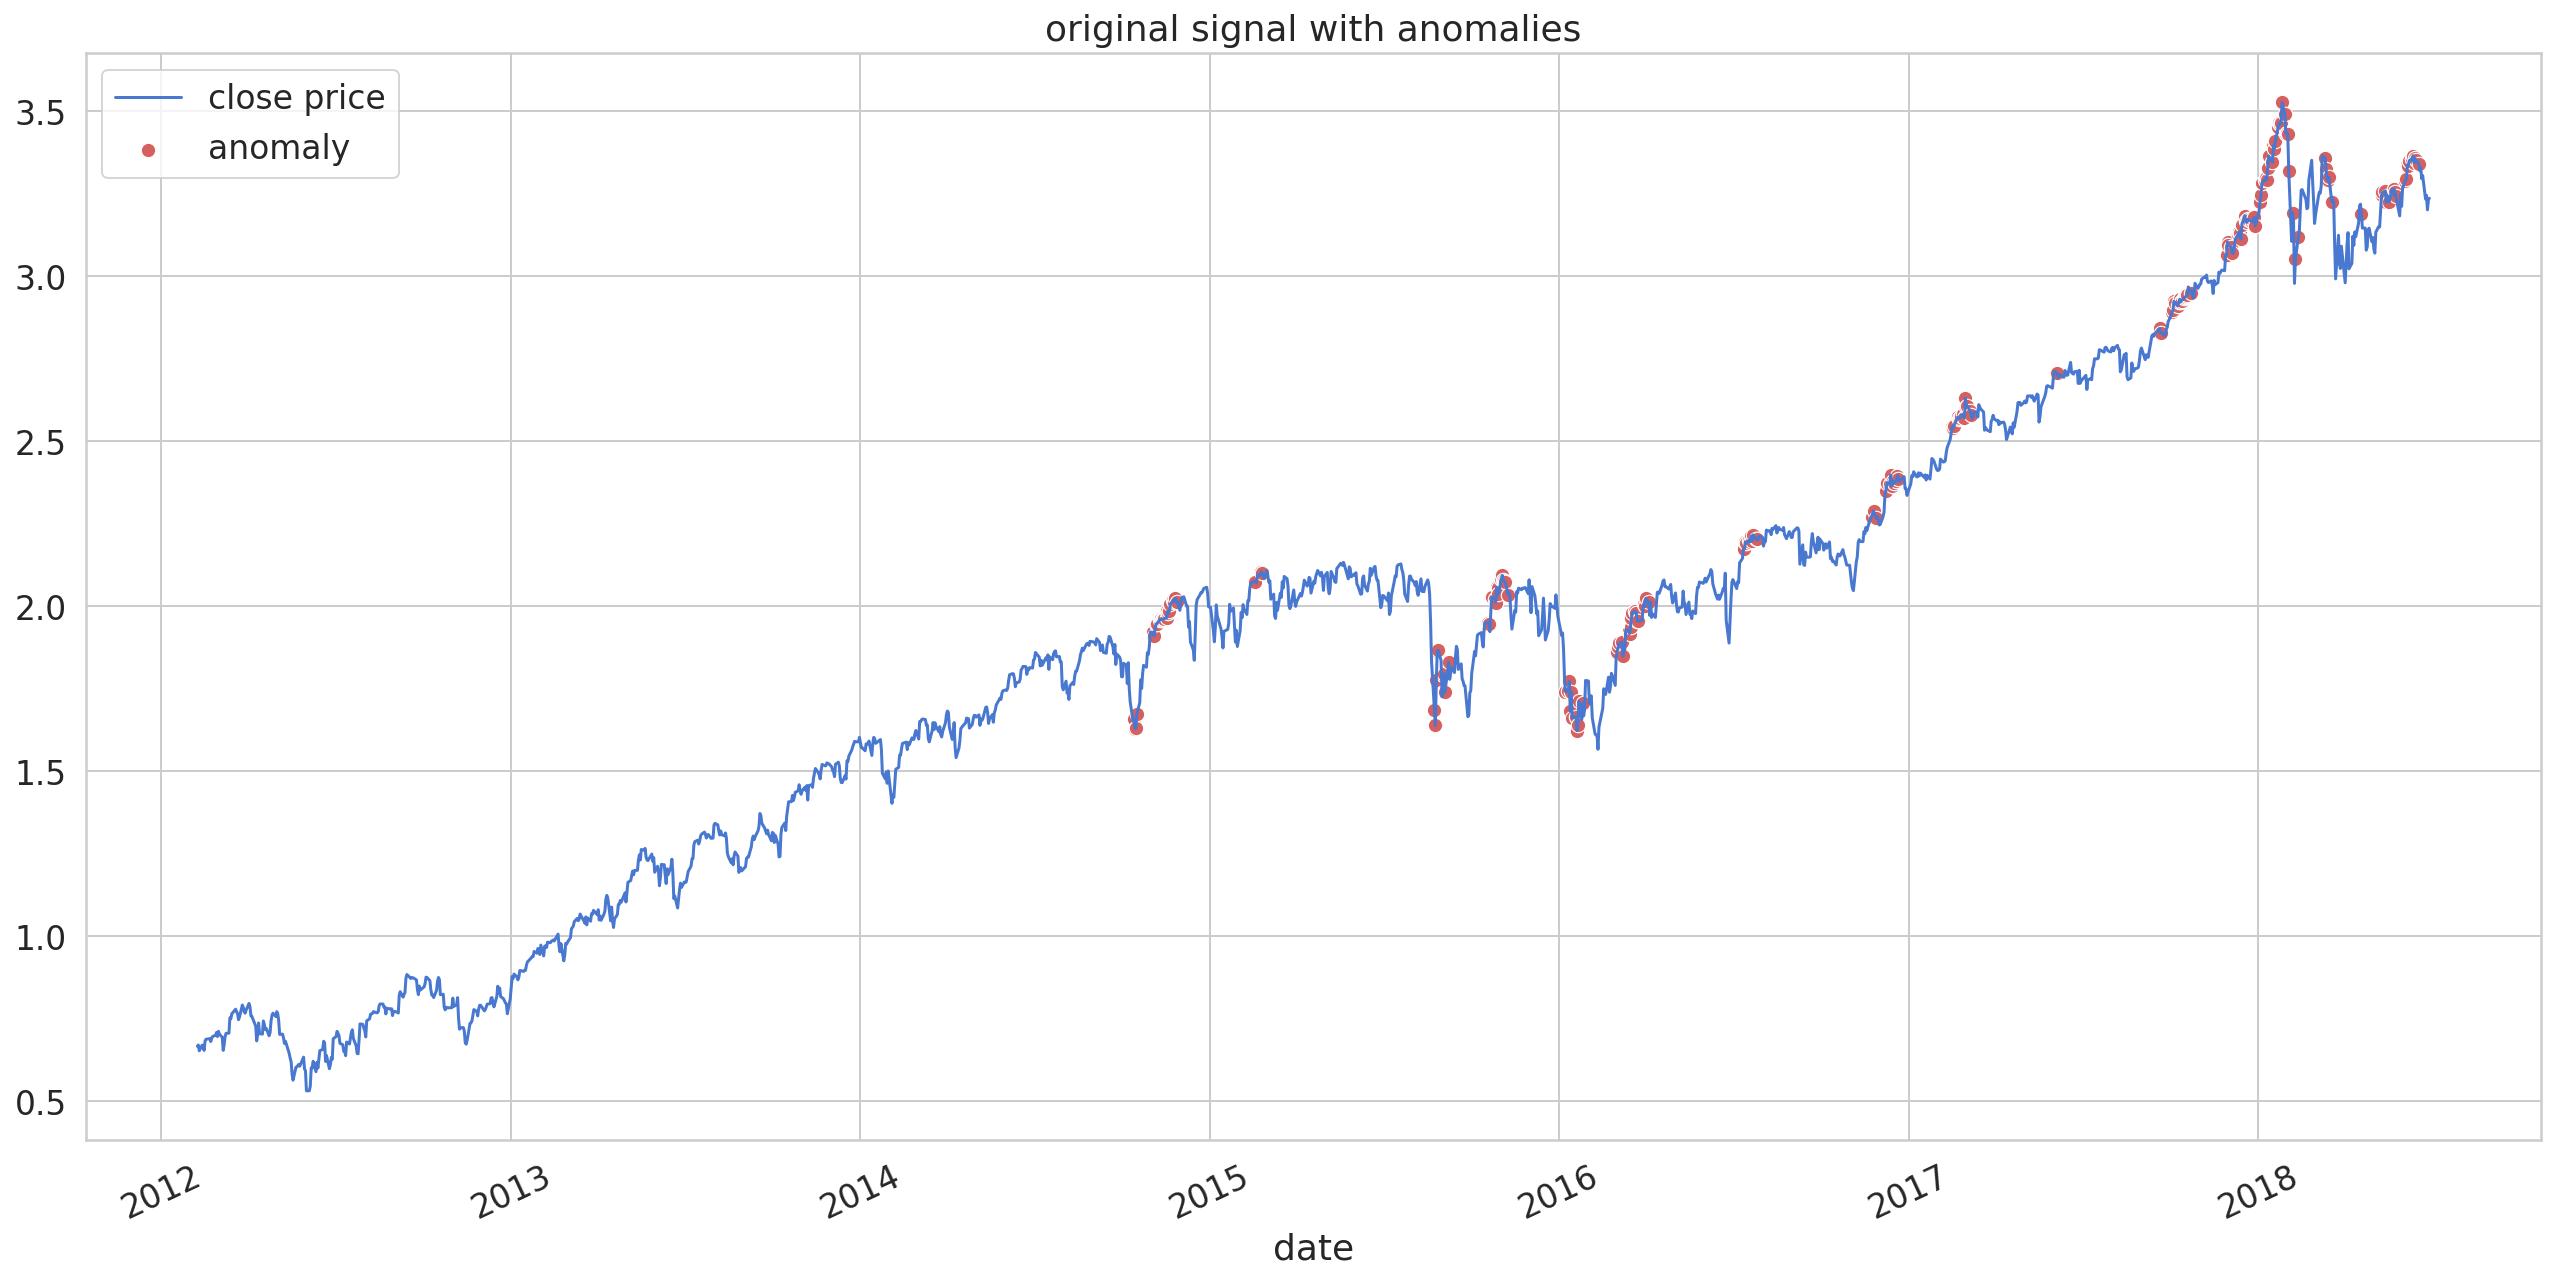

In [49]:
plt.plot(
  test[TIME_STEPS:].index, 
  scaler.inverse_transform(test[TIME_STEPS:].close), 
  label='close price'
);

sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform(anomalies.close),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.title('original signal with anomalies')
plt.legend();